In [172]:
import requests
import json
from citipy import citipy
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#for citipy documentations, see https://github.com/wingchen/citipy

In [226]:
#set how many pulls will be done. This is to make sure we are not overlimit

pull_number = 6
half_number = int(pull_number/2)

half_number

3

In [230]:
# Down the line, we are required to split between souther and northen hemisphere for regression
# let's make it so first 50% of pull is for north, the rest of 50% is for south

#Create random latt and longitude
north_lat = []
south_lat = []

north_lon = []
south_lon = []

lat = []
lon = []


        

In [231]:
for x in range(0 , half_number):
        a = random.uniform(0,70.0)
        b = random.uniform(-70.0,70.0)
        north_lat.append(a)
        north_lon.append(b)        
        lat.append(a)
        lon.append(b)
for y in range(half_number, pull_number ):
        a = random.uniform(-70.0,-0.1)
        b = random.uniform(-70.0,70.0)
        south_lat.append(a)
        south_lon.append(b)        
        lat.append(a)
        lon.append(b) 

In [233]:
lat

[41.79796392199831,
 2.657726296352152,
 65.34240439594119,
 -27.463815268611583,
 -26.347059702066254,
 -38.80207884113506]

In [218]:
#Create json pull request.

url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=a3080dc4dc4f2b07d48f140771b213ff"

#Singular key trial
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
descriptions = []
lat_temp = []
lon_temp = []


In [234]:
#Looping the request
y = 0

#remember, set the last number in range() to limit how many request per pull. 
for y in range(0,pull_number):
    url_lat = "http://api.openweathermap.org/data/2.5/weather?lat="+ str(lat[y]) + "&lon=" +str(lon[y]) + "&appid=a3080dc4dc4f2b07d48f140771b213ff"
    response = requests.get(url_lat)
    weather = response.json()
    temperature.append(weather["main"]["temp"])
    humidity.append(weather["main"]["humidity"])
    cloudiness.append(weather["clouds"]["all"])
    wind_speed.append(weather["wind"]["speed"])
    lat_temp.append(lat[y])
    lon_temp.append(lon[y])
    city = citipy.nearest_city(lat[y], lon[y])
    city_name.append(city.city_name)
    printout = ("City name is: " +str(city_name[y]),
               "Temperature is: " +str(temperature[y]) + " Fahrenheit",
                "Humidity is: " +str(humidity[y]) +" %",
                "Cloudiness is: "+str(cloudiness[y]) +" %",
                "Wind Speed is: "+str(wind_speed[y])  +" mph"
               )
    descriptions.append(printout)
    
    


In [235]:
# fill this cell with writing output to CSV
ind = np.arange(0,len(descriptions) )
city_out = pd.DataFrame({"City Prints": descriptions,
             "Index":ind}).set_index("Index")
out_path = ("output/city_desc.csv")
city_out.to_csv(out_path)

PermissionError: [Errno 13] Permission denied: 'output/city_desc.csv'

In [ ]:
#cells above requires pull. Be wary of doing too many pulls!
humidity

In [ ]:
#Create Scatter Plot 1
#Temperature (F) vs Latitude 





plt.scatter(x = lat_temp, y=temperature)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Effect of Latitude to Temperature(F)")
plt.xlim(-70,70)
plt.savefig("output/scatter1")

print("This scatter plot is trying to find relationship between latitude to temperature (F)")

In [ ]:
#Create Scatter Plot 2
#Humidity (%) vs Latitude
plt.scatter(x = lat_temp, y=humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Effect of Latitude to Humidity")
plt.xlim(-70,70)
plt.savefig("output/scatter2")
print("This scatter plot is trying to find relationship between latitude to humidity")

In [ ]:
#Create Scatter Plot 3
#Cloudiness (%) vs Latitude
plt.scatter(x = lat_temp, y=cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Effect of Latitude to Cloudiness")
plt.xlim(-70,70)
plt.savefig("output/scatter3")
print("This scatter plot is trying to find relationship between latitude to cloudiness")

This scatter plot is trying to find relationship between latitude to wind speed


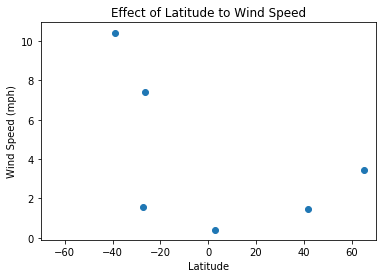

In [236]:
#Create Scatter Plot 4
#Wind Speed vs Latitude
plt.scatter(x = lat_temp, y=wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Effect of Latitude to Wind Speed")
plt.xlim(-70,70)
plt.savefig("output/scatter4")
print("This scatter plot is trying to find relationship between latitude to wind speed")

In [ ]:
#  

In [26]:
#Sample citipy
city = citipy.nearest_city(2.2212, 51.3398)
city.city_name

'hobyo'